In [1]:
import pandas as pd
import json
import urllib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('mode.chained_assignment', None)

In [2]:
raw_url = "https://raw.githubusercontent.com/datameet/covid19/master/data/all_totals.json"
all_totals_url = urllib.request.urlopen(raw_url)
totals = json.loads(all_totals_url.read())

In [3]:
totals = totals.pop("rows")

In [4]:
placer = 0
index = 0
india = pd.DataFrame(columns=["date", "active_cases", "cured", "deaths", "cases"])
date = ''
active_cases = 0
cured = 0
dead = 0
cases = 0
for x in totals:
    if placer % 4 == 0:
        date = x['key'][0][:10]
        active_cases = x['value']
    elif placer % 4 == 1:
        cured = x['value']
    elif placer % 4 == 2:
        dead = x['value']
    elif placer % 4 == 3:
        cases = x['value']
        india.loc[index] = [date, active_cases, cured, dead, cases]
        index += 1
    placer += 1

In [5]:
india_url = 'https://raw.githubusercontent.com/datameet/covid19/master/data/icmr_testing_status.json'
jsonurl = urllib.request.urlopen(india_url)
text = json.loads(jsonurl.read())

In [6]:
text.pop("total_rows");
text.pop("offset");
text = text.pop("rows");

In [7]:
india['tests'] = 0;

In [8]:
india.drop_duplicates("date", keep="last", inplace=True, ignore_index=True)

In [9]:
for x in text:
    x = x.pop("value")
    date = x['report_time'][:10]
    location = india.loc[india['date']==date].index[0]
    india.loc[location, "tests"] = x['samples']

In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [11]:
india['tests'][9:13] = india['tests'][8]
india['tests'][21] = india['tests'][20]
india['tests'][23:28] = india['tests'][22]

In [12]:
india.tail()

,date,active_cases,cured,deaths,cases,tests
37,2020-04-11,6634,653,242,7529,179374
38,2020-04-12,7409,765,273,8447,195748
39,2020-04-13,8048,980,324,9352,217554
40,2020-04-14,9272,1190,353,10815,244893
41,2020-04-15,10197,1344,392,11933,274599


In [13]:
#convert date values to datetime format
india['date'] = pd.to_datetime(india['date'])

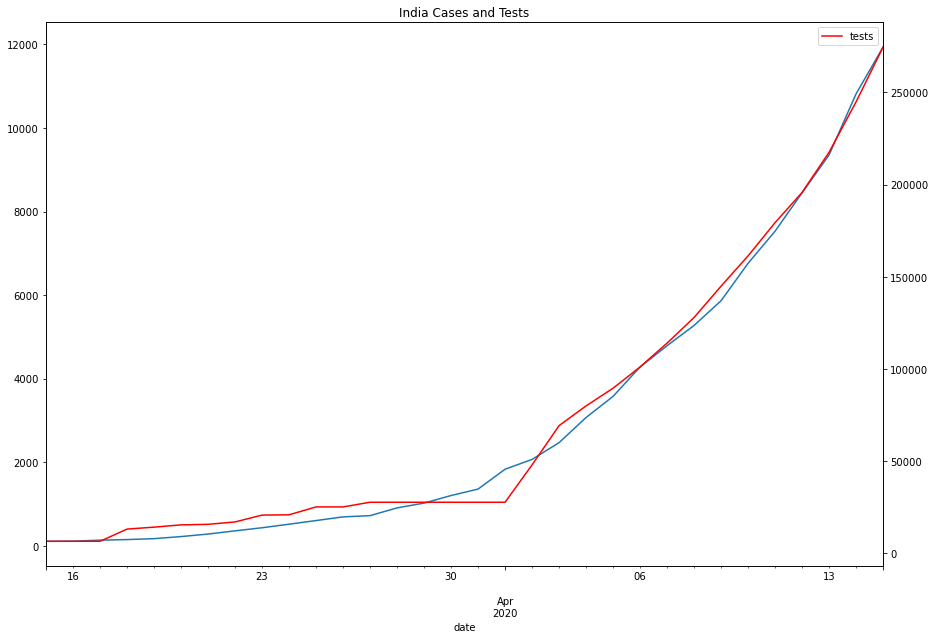

In [14]:
#line graphs for cases and tests over time in india
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = india.query('cases >= 100')
df.plot(x="date", y="cases", legend=False, ax=ax, title="India Cases and Tests")
ax2 = ax.twinx()
ax2.get_yaxis().get_major_formatter().set_scientific(False)
df.plot(x="date", y="tests", legend=True, ax=ax2, color="red")
plt.show();

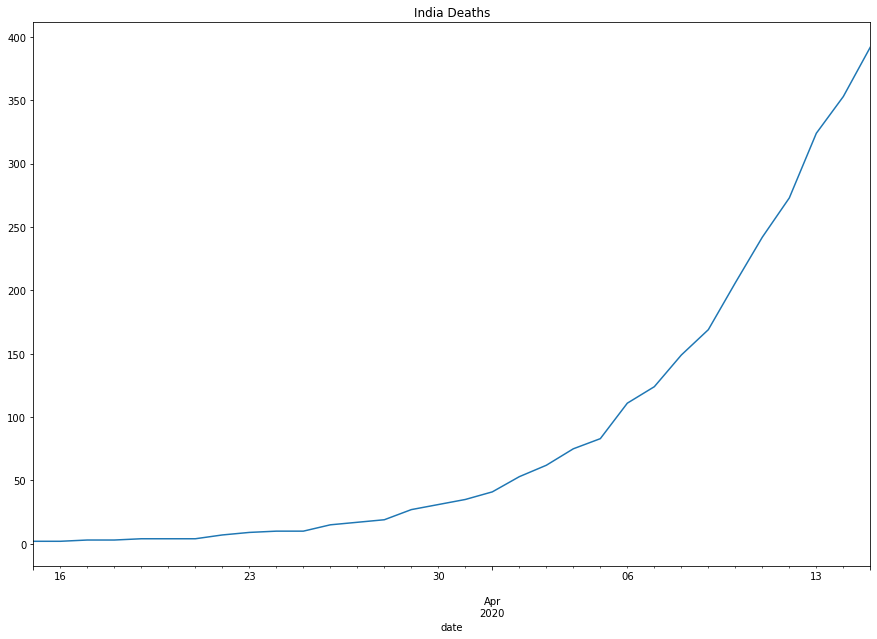

In [15]:
#line graph for deaths in india overtime
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = india.query('cases >= 100')
df.plot(x="date", y="deaths", legend=False, ax=ax, title="India Deaths")

plt.show();

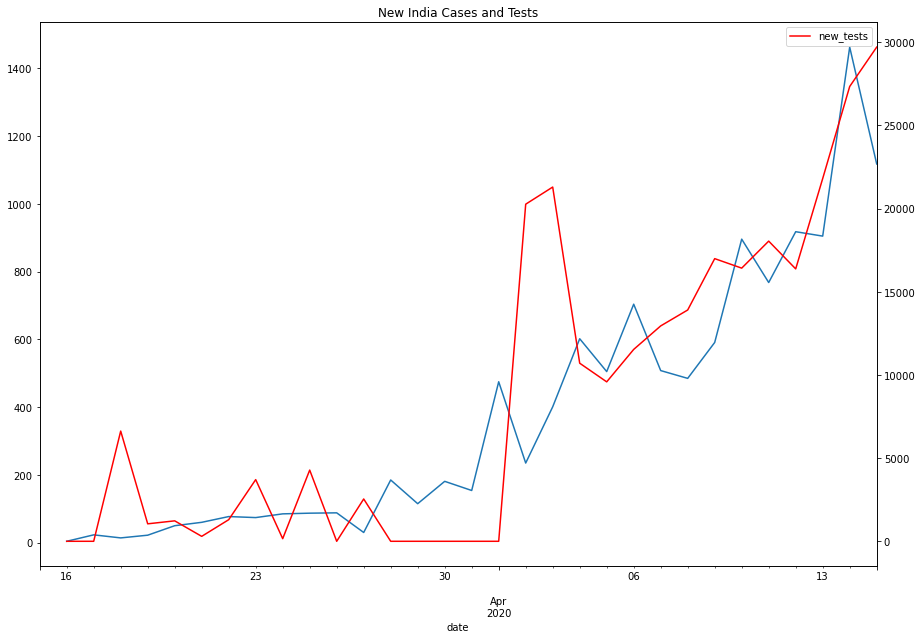

In [16]:
#line graphs for increase in cases and tests over time in india
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = india.query('cases >= 100')
df['new_cases'] = df.cases.diff().values
df.plot(x="date", y="new_cases", legend=False, ax=ax, title="New India Cases and Tests")
ax2 = ax.twinx()
df['new_tests'] = df.tests.diff().values
ax2.get_yaxis().get_major_formatter().set_scientific(False)
df.plot(x="date", y="new_tests", legend=True, ax=ax2, color="red")
plt.show();

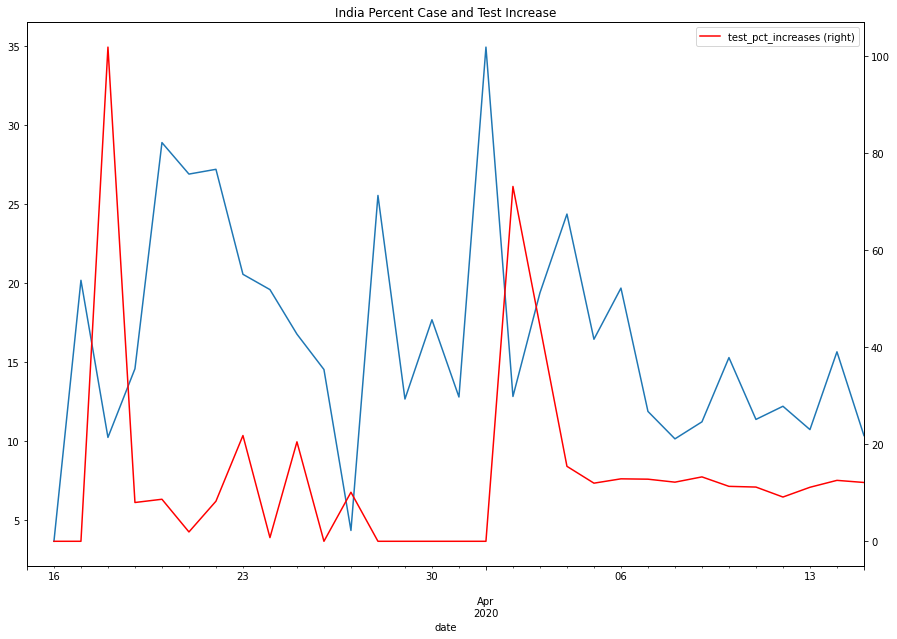

In [17]:
#line graphs for percent increase in cases and tests over time in india
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = india.query('cases >= 100')
df['new_pct_cases'] = df.cases.pct_change().values * 100
df.plot(x="date", y="new_pct_cases", legend=False, ax=ax, title="India Percent Case and Test Increase")
ax2 = ax.twinx()
df['test_pct_increases'] = df.tests.pct_change().values * 100
ax2.get_yaxis().get_major_formatter().set_scientific(False)
df.plot(x="date", y="test_pct_increases", legend=True, ax=ax2, color="red", secondary_y=True)
plt.show();

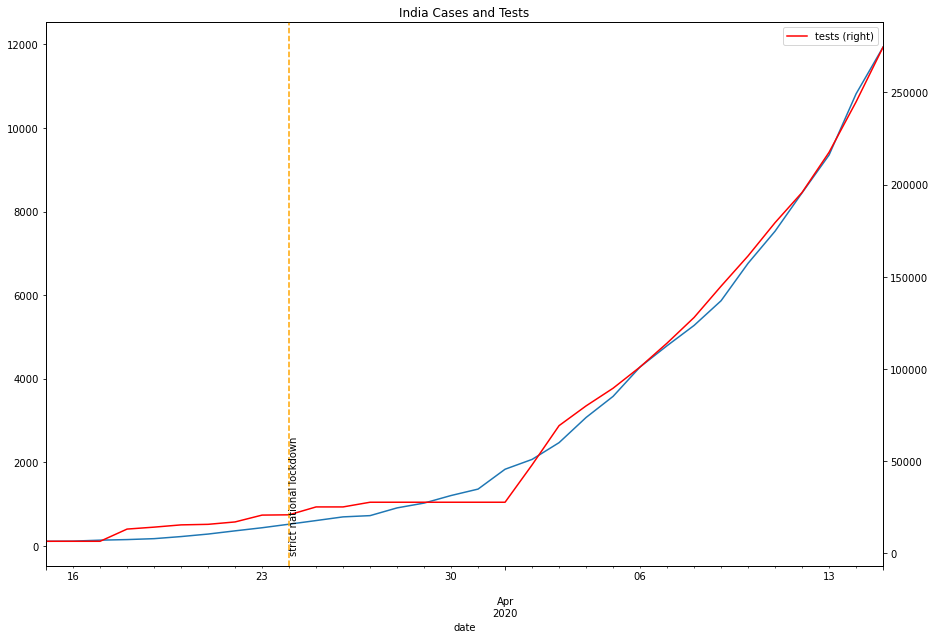

In [18]:
#line graphs for cases and tests over time in india with time of severe national lockdown
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = india.query('cases >= 100')
df.plot(x="date", y="cases", legend=False, ax=ax, title="India Cases and Tests")
ax2 = ax.twinx()
ax2.get_yaxis().get_major_formatter().set_scientific(False)
df.plot(x="date", y="tests", legend=True, ax=ax2, color="red", secondary_y=True)
plt.axvline("2020-03-24", linestyle='--', color='orange')
plt.text("2020-03-24", 4, "strict national lockdown", rotation=90)
plt.show();

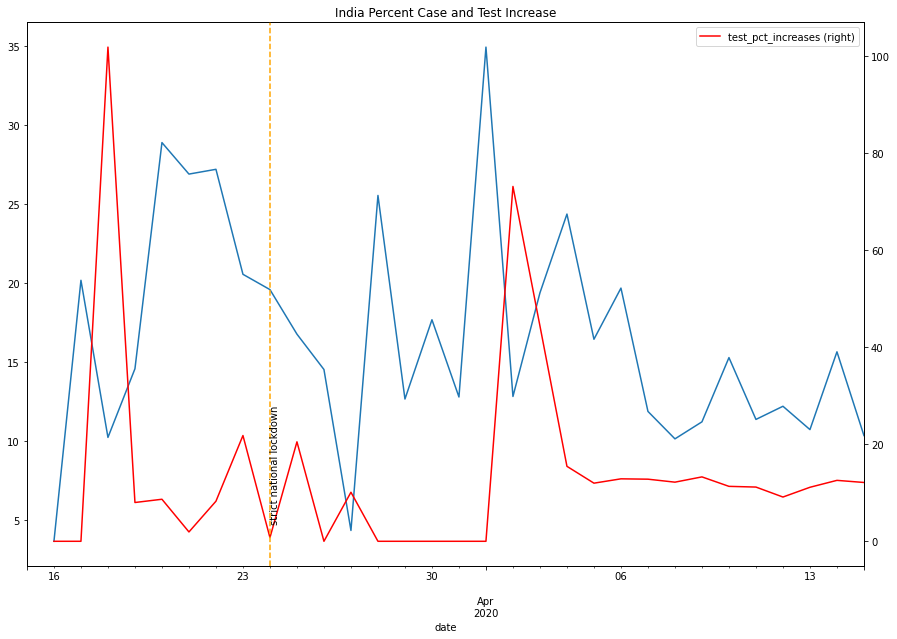

In [19]:
#line graphs for percentage increase in cases and tests over time in india with legislation
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = india.query('cases >= 100')
df['new_pct_cases'] = df.cases.pct_change().values * 100
df.plot(x="date", y="new_pct_cases", legend=False, ax=ax, title="India Percent Case and Test Increase")
ax2 = ax.twinx()
df['test_pct_increases'] = df.tests.pct_change().values * 100
ax2.get_yaxis().get_major_formatter().set_scientific(False)
df.plot(x="date", y="test_pct_increases", legend=True, ax=ax2, color="red", secondary_y=True)
plt.axvline("2020-03-24", linestyle='--', color='orange')
plt.text("2020-03-24", 4, "strict national lockdown", rotation=90)
plt.show();

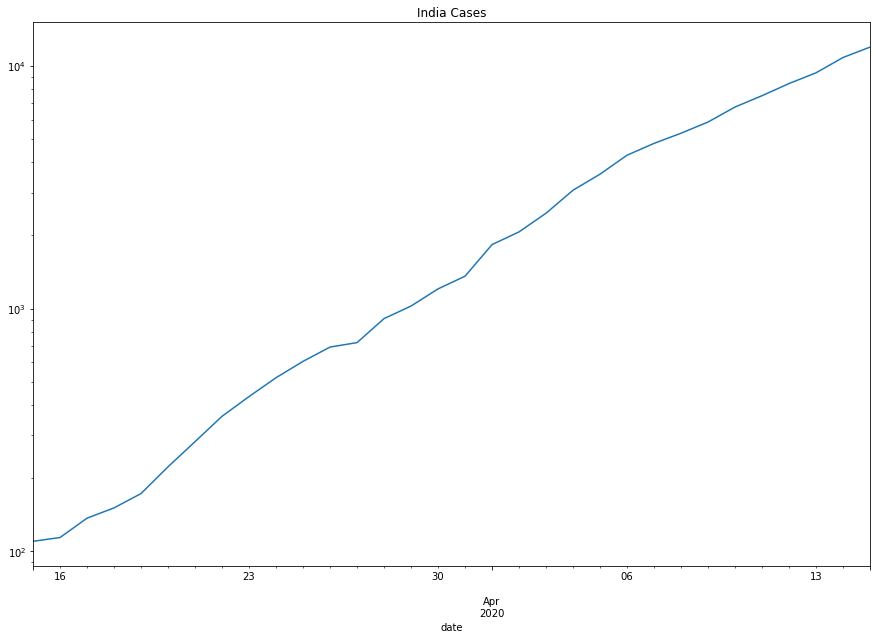

In [20]:
#line graphs for cases over time in india on a logarithmic scale for enhanced clarity
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = india.query('cases >= 100')
df.plot(x="date", y="cases", legend=False, ax=ax, title="India Cases", logy=True)
plt.show();

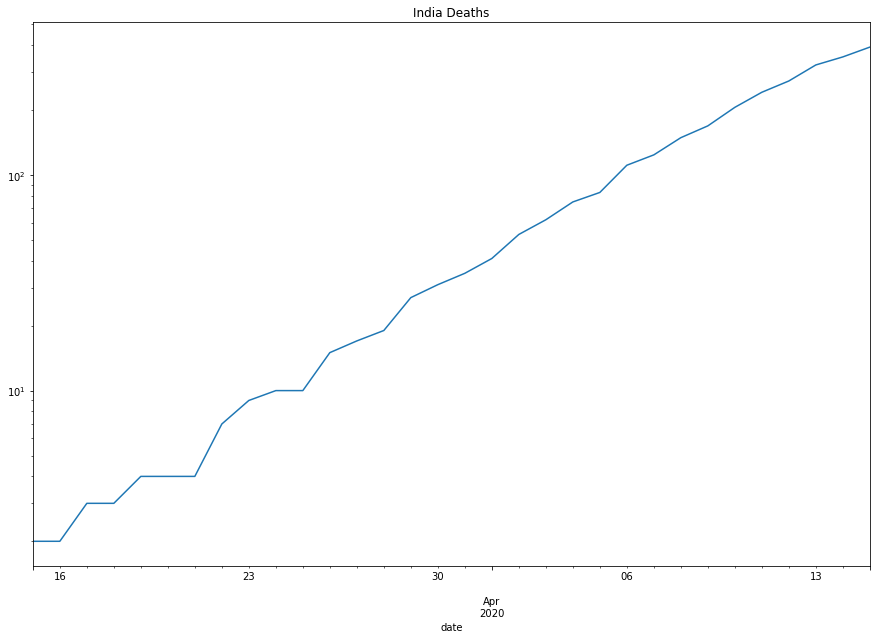

In [21]:
#line graphs for deaths over time in india on a logarithmic scale for enhanced clarity
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = india.query('cases >= 100')
df.plot(x="date", y="deaths", legend=False, ax=ax, title="India Deaths", logy=True)
plt.show();